As a data scientist, we should know how to find relationships among people by using the network they create within each other. So here, in this file, we will go through the implementation of Graph Algorithms with Python.

### What are Graph Algorithms?

As a machine learning practitioners, we have become quite comfortable with Pandas or SQL or any relational database. Often we see our users in rows with their attributes in columns. But does the real world behave this way?

In a connected world, users cannot be seen as independent entities. They have certain relationships with each other and sometimes we would like to include such relationships when building our machine learning models.

While in a relational database we cannot use such relationships between different users, however in a graph database it is quite trivial to do so. In this file, we're going to talk about some of the most important graphics algorithms we should know about and how to implement them using Python.

#### Graph Algorithms: Connected Components

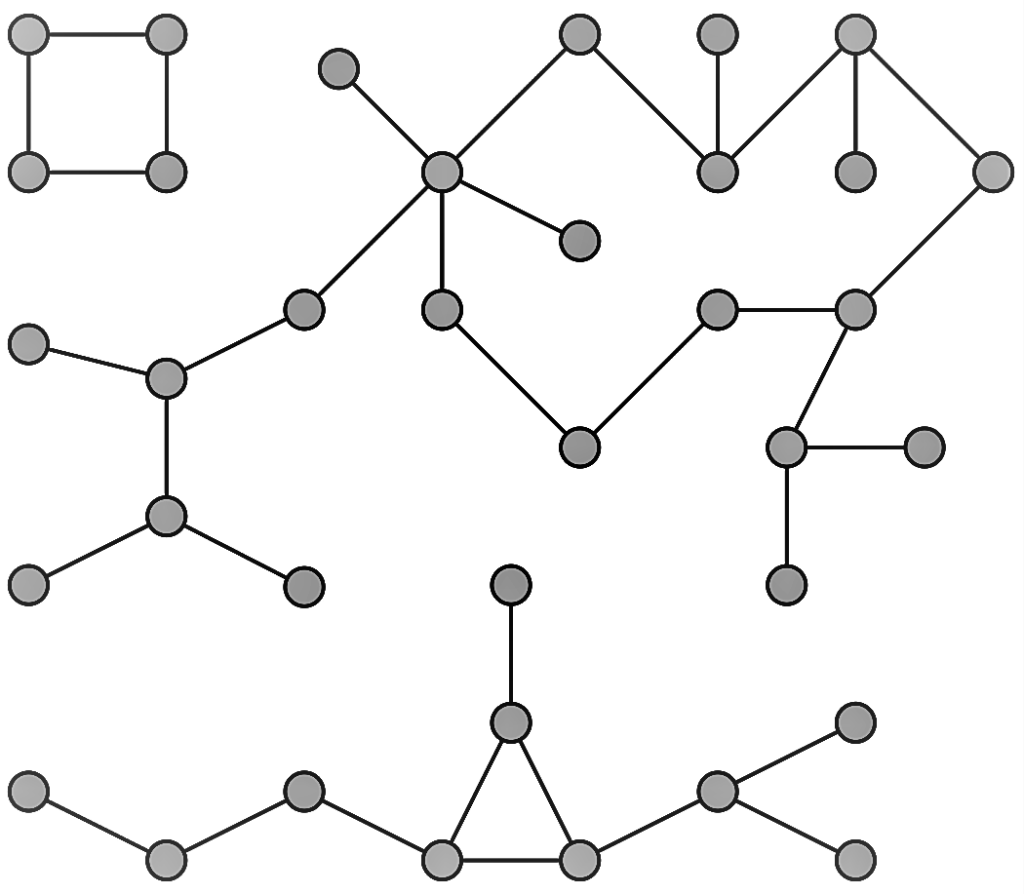

We can think of connected components in very simple terms as a kind of hard clustering algorithm that finds clusters in connected data.

As a concrete example: let’s say we have data on roads connecting two cities and we have to find out all the continents of the world and what city they contain.

The algorithm of connected components that we use to do this is based on a special case of **BFS / DFS**. We won’t talk much about how it works here, but we’ll see how to get the code to work with **Networkx**.

We will be using **Networkx** module to build and analyze our graphical algorithms. Let’s start with an example chart that contains cities and distance information between them.

We’ll start by creating a list of edges with the distances that we’ll add as the edge weight:

In [55]:
# creating a network linking cities with their distance.

edgelist = [['Mannheim', 'Frankfurt', 85], ['Mannheim', 'Karlsruhe', 80], 
['Erfurt', 'Wurzburg', 186], ['Munchen', 'Numberg', 167], ['Munchen', 'Augsburg', 84], 
['Munchen', 'Kassel', 502], ['Numberg', 'Stuttgart', 183], ['Numberg', 'Wurzburg', 103], 
['Numberg', 'Munchen', 167], ['Stuttgart', 'Numberg', 183], ['Augsburg', 'Munchen', 84], 
['Augsburg', 'Karlsruhe', 250], ['Kassel', 'Munchen', 502], ['Kassel', 'Frankfurt', 173], 
['Frankfurt', 'Mannheim', 85], ['Frankfurt', 'Wurzburg', 217], ['Frankfurt', 'Kassel', 173], 
['Wurzburg', 'Numberg', 103], ['Wurzburg', 'Erfurt', 186], ['Wurzburg', 'Frankfurt', 217], 
['Karlsruhe', 'Mannheim', 80], ['Karlsruhe', 'Augsburg', 250],["Mumbai", "Delhi",400],
["Delhi", "Kolkata",500],["Kolkata", "Bangalore",600],["TX", "NY",1200],["ALB", "NY",800]]

Now we will create a graph:

In [56]:
import networkx as nx
import plotly as plt

In [57]:
# We create a graph with the previous data.

g = nx.Graph()
for edge in edgelist: 
    g.add_edge(edge[0],edge[1], weight = edge[2])


We now want to discover the different continents and their cities from this graph. We can do this using the algorithm of connected components:

In [58]:
# Finding out distinct continents and their cities from this graph.
for i, x in enumerate(nx.connected_components(g)): 
    print("cc"+str(i)+":",x)

cc0: {'Wurzburg', 'Karlsruhe', 'Augsburg', 'Munchen', 'Frankfurt', 'Kassel', 'Numberg', 'Stuttgart', 'Mannheim', 'Erfurt'}
cc1: {'Delhi', 'Kolkata', 'Bangalore', 'Mumbai'}
cc2: {'NY', 'ALB', 'TX'}


We can find distinct network components in our data by using edges and vertices. This graph algorithm can be used on different datasets to satisfy any use case as above.

### Graph Algorithms: Shortest Path

Continuing with the above example, we are given a graph with the cities of Germany and their respective distances. We want to know how to get from **Frankfurt (the starting node)** to **Munich** by covering the shortest distance.

Applying the shortest route in graphical algorithms is used in Google Maps to find the shortest route. Let’s say we are in a **Walmart store** and we have different aisles and the distance between all the aisles. We want to offer the customer the shortest route between **aisle A** and **aisle D**.

In [59]:
# Find the shortest path between Stuttgart and Frankfurt and its length.

print(nx.shortest_path(g, 'Stuttgart','Frankfurt',weight='weight')) 

print(nx.shortest_path_length(g, 'Stuttgart','Frankfurt',weight='weight'))

['Stuttgart', 'Numberg', 'Wurzburg', 'Frankfurt']
503


To find the shortest path between all the pairs we can simply use a **for loop**:



In [60]:
# Find the shortest path among the cities of the graph.

for x in nx.all_pairs_dijkstra_path(g,weight='weight'): 
    print(x)

('Mannheim', {'Mannheim': ['Mannheim'], 'Frankfurt': ['Mannheim', 'Frankfurt'], 'Karlsruhe': ['Mannheim', 'Karlsruhe'], 'Augsburg': ['Mannheim', 'Karlsruhe', 'Augsburg'], 'Kassel': ['Mannheim', 'Frankfurt', 'Kassel'], 'Wurzburg': ['Mannheim', 'Frankfurt', 'Wurzburg'], 'Munchen': ['Mannheim', 'Karlsruhe', 'Augsburg', 'Munchen'], 'Erfurt': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg'], 'Stuttgart': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg', 'Stuttgart']})
('Frankfurt', {'Frankfurt': ['Frankfurt'], 'Mannheim': ['Frankfurt', 'Mannheim'], 'Kassel': ['Frankfurt', 'Kassel'], 'Wurzburg': ['Frankfurt', 'Wurzburg'], 'Karlsruhe': ['Frankfurt', 'Mannheim', 'Karlsruhe'], 'Augsburg': ['Frankfurt', 'Mannheim', 'Karlsruhe', 'Augsburg'], 'Munchen': ['Frankfurt', 'Wurzburg', 'Numberg', 'Munchen'], 'Erfurt': ['Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Frankfurt', 'Wurzburg', 'Numberg'], 'Stuttgart': ['Frankfurt', 'Wurzburg', 'Numb

### Minimum spannig tree

We need to connect all the cities in the graph we have using the minimum amount of **wire/pipe**. 

In [61]:
# returns a instance of type graph

nx.minimum_spanning_tree(g) # returns a instance of type nx.minimum_spanning_tree(g)

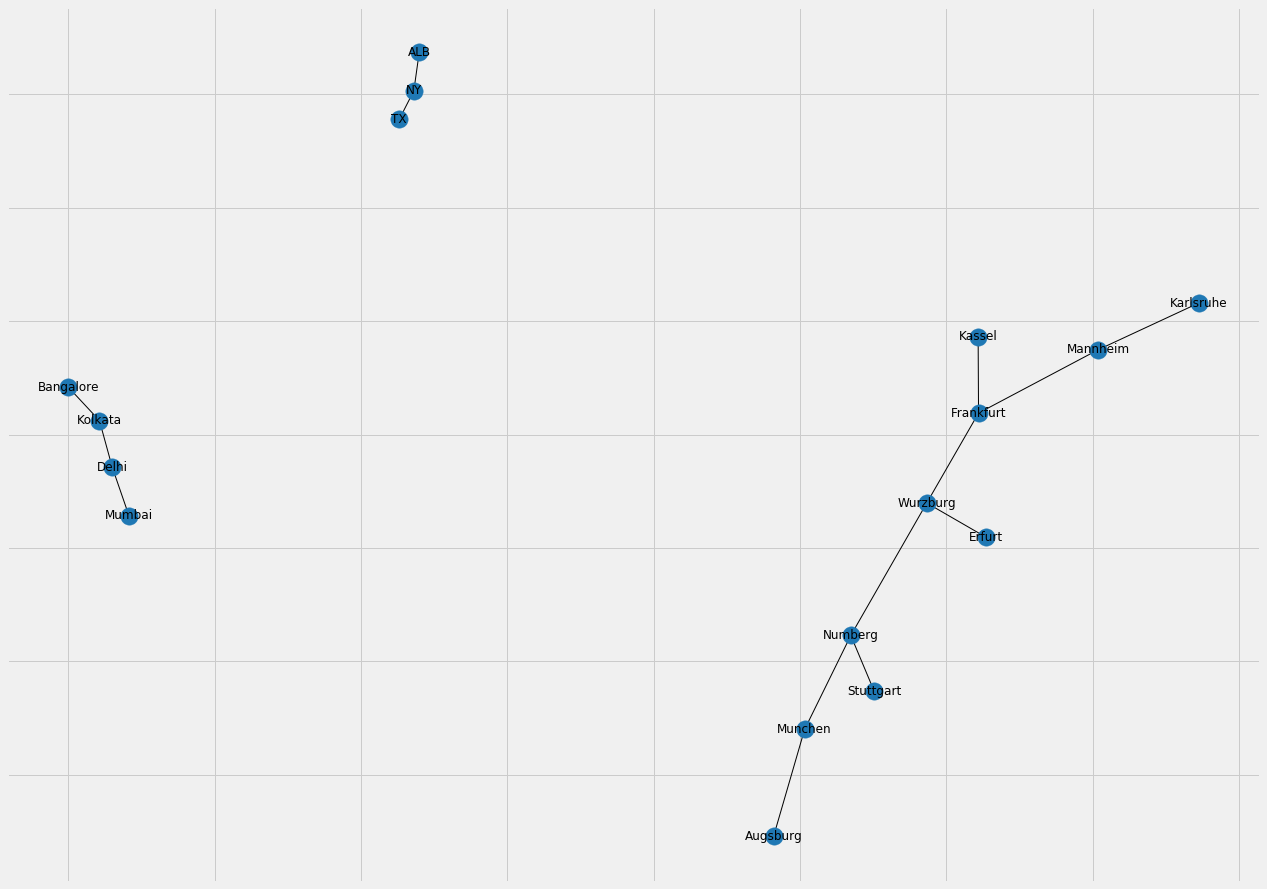

In [62]:
nx.draw_networkx(nx.minimum_spanning_tree(g)) # graph will shuffle each time we run the cell. See example below

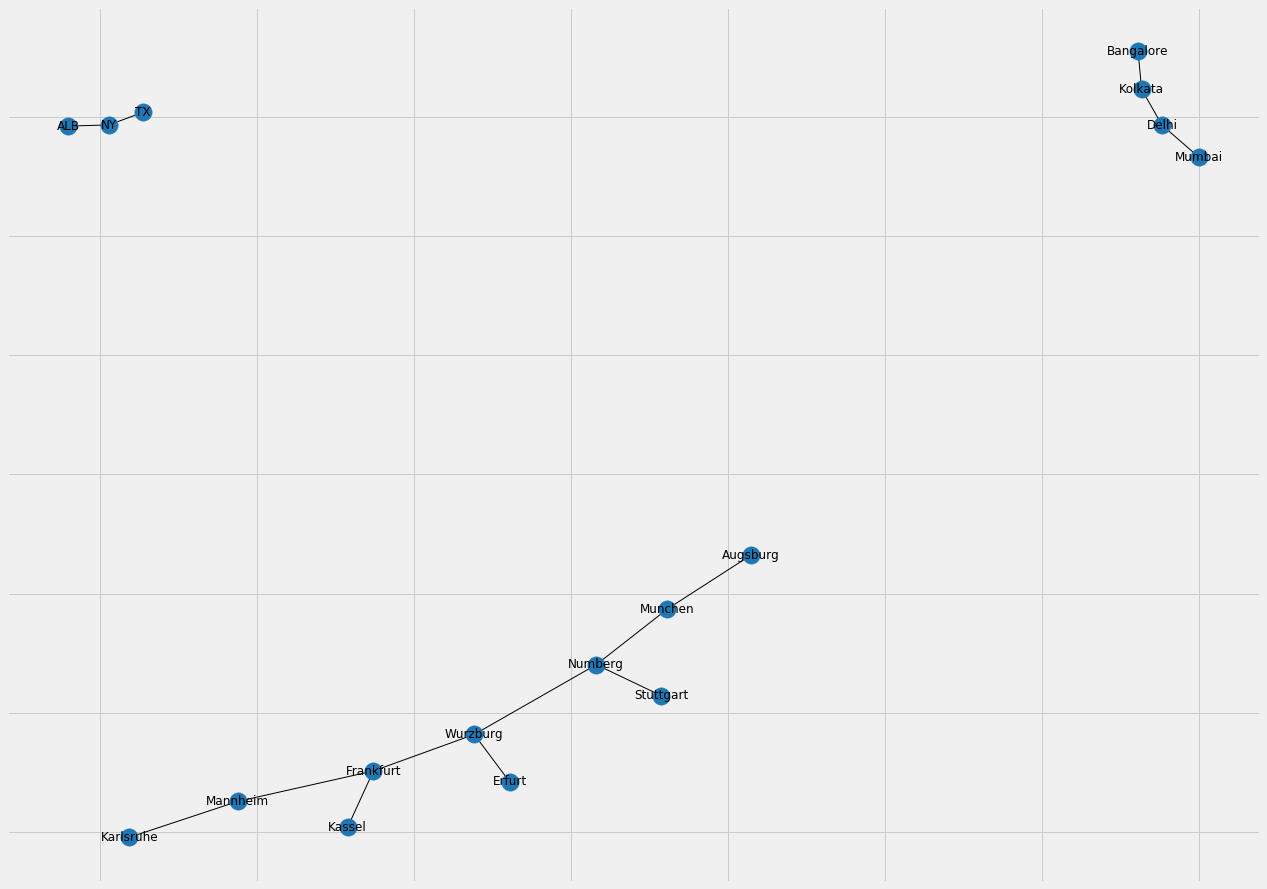

In [63]:
nx.draw_networkx(nx.minimum_spanning_tree(g))

### PAGE RANK

It assigns scores to pages based on the number and quality of incoming and outgoing links. Pagerank can be used anywhere where we want to estimate node importance in any network.

Create Link between user if user **A** follows user **B** and Link between user and Tweets if user tweets/retweets a tweet.

For this we are finally going to retrieve the Facebook Network data collection (!)

### Graph Algorithms: Pagerank

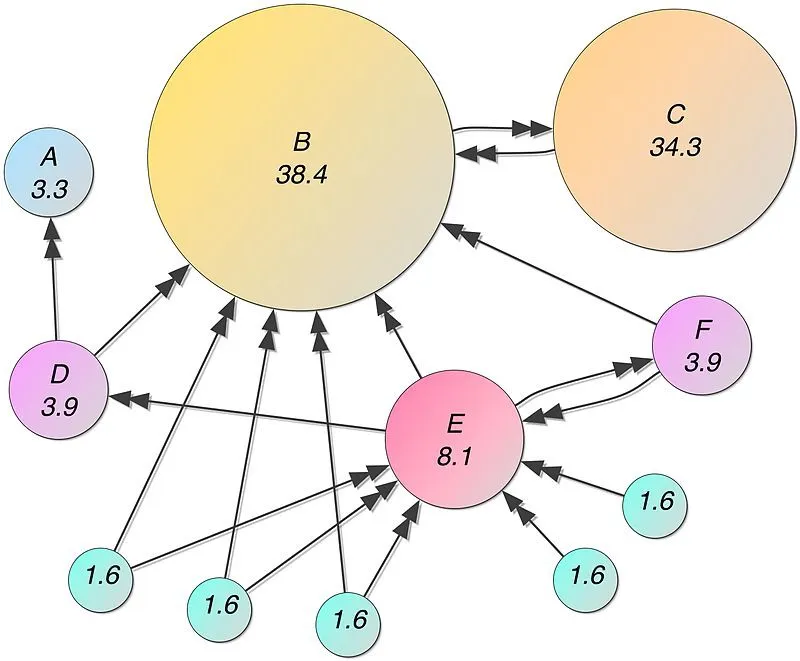

It’s the page sorting algorithm that has fueled Google for a long time. It assigns scores to pages based on the number and quality of inbound and outbound links.

The **Pagerank** can be used anywhere we want to estimate the importance of nodes in any network. Here we are going to use **Facebook** data. We have an **edge/link** file between Facebook users. Let’s first create the FB graph:

In [64]:
fb = nx.read_edgelist('facebook-combined.txt', create_using = nx.Graph(), nodetype = int)

In [65]:
# let us plot the network to see how does it look like:
pos = nx.spring_layout(fb)

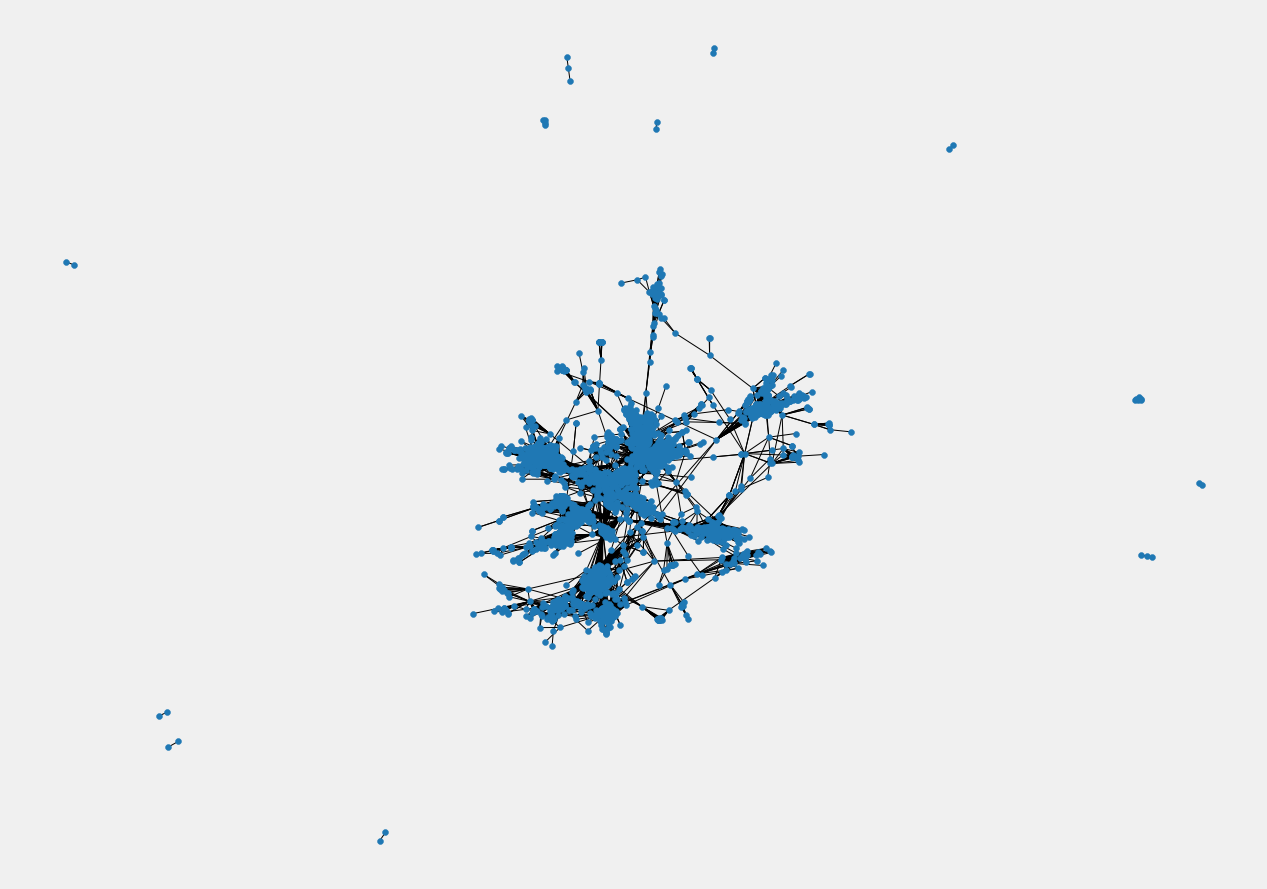

In [66]:
# Let’s create the graph:
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

plt.style.use('fivethirtyeight') 
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')

nx.draw_networkx(fb, pos, with_labels = False, node_size = 35) 
plt.show()

In [67]:
# compute the page rank for all the nodes.

pageranks = nx.pagerank(fb)

print(pageranks)

{236: 0.00040273350777135687, 186: 0.0004584102760849686, 122: 0.0006583530605460558, 285: 0.0005090717031199382, 24: 0.0002166496571972657, 346: 0.0003554045173795468, 271: 0.0007410822505710922, 304: 0.0005718369216881563, 176: 0.00016440973923707774, 9: 0.0005951186169770776, 130: 0.0002258138004064847, 329: 0.0004175758949696838, 204: 0.00028833486803640253, 213: 0.0004424314012934176, 252: 0.0006659517516172068, 332: 0.0004747855984722756, 82: 0.00037682838697575705, 65: 0.00014738472947502384, 276: 0.00020222398863861075, 26: 0.0006871409321492673, 280: 0.0004943116294975165, 272: 0.0004971343797290029, 211: 0.0003184396910876556, 199: 0.000491966060350841, 84: 0.0001885008002631856, 133: 0.0002397965981560319, 62: 0.00028433957785981066, 239: 0.0006318113245748385, 172: 0.0004318536497658858, 322: 0.0007955678183009376, 53: 0.0004169383655038068, 3: 0.00022336711537103987, 170: 0.0005177426983249756, 175: 0.0004882885529796974, 46: 0.00014807670502753643, 56: 0.00080356951777076

In [68]:
# order the page rank results

import operator

sorted_pagerank = sorted(pageranks.items(), 

key=operator.itemgetter(1),reverse = True)

print(sorted_pagerank)

[(483, 0.0013599133699007315), (3830, 0.001344712983637226), (2313, 0.0009589781687839357), (376, 0.0009407023103604414), (2047, 0.0009130312315135463), (25, 0.0008304997705713243), (428, 0.000824312558770473), (828, 0.0008225679328783261), (475, 0.00081384581561758), (56, 0.0008035695177707603), (713, 0.0008004654101467428), (563, 0.0007962713502904459), (322, 0.0007955678183009376), (3596, 0.0007949357034193668), (917, 0.0007823127936733765), (119, 0.0007789660623617493), (67, 0.0007691566193893668), (3938, 0.0007516860513185362), (3545, 0.0007501788729766726), (271, 0.0007410822505710922), (277, 0.0007347411483125703), (3604, 0.0007297281072696944), (3918, 0.0007246848376345666), (3521, 0.0007167615744546169), (2951, 0.0007165083564460057), (1888, 0.000713986759484675), (705, 0.000709195558438081), (1800, 0.0007016685520003213), (3101, 0.0006990632389889727), (637, 0.0006940187495770336), (3291, 0.0006932710003326877), (412, 0.0006925249491098433), (1783, 0.0006913325901728572), (21

In [69]:
# Create a subgraph with more influential users.

first_degree_connected_nodes = list(fb.neighbors(3438)) # The node 3438 in the graph.
second_degree_connected_nodes = []

In [70]:
for x in first_degree_connected_nodes:
    second_degree_connected_nodes+=list(fb.neighbors(x)) 

second_degree_connected_nodes.remove(3438) 
second_degree_connected_nodes = list(set(second_degree_connected_nodes))

In [71]:
subgraph_3438 = nx.subgraph(fb, first_degree_connected_nodes + second_degree_connected_nodes)

pos = nx.spring_layout(subgraph_3438)

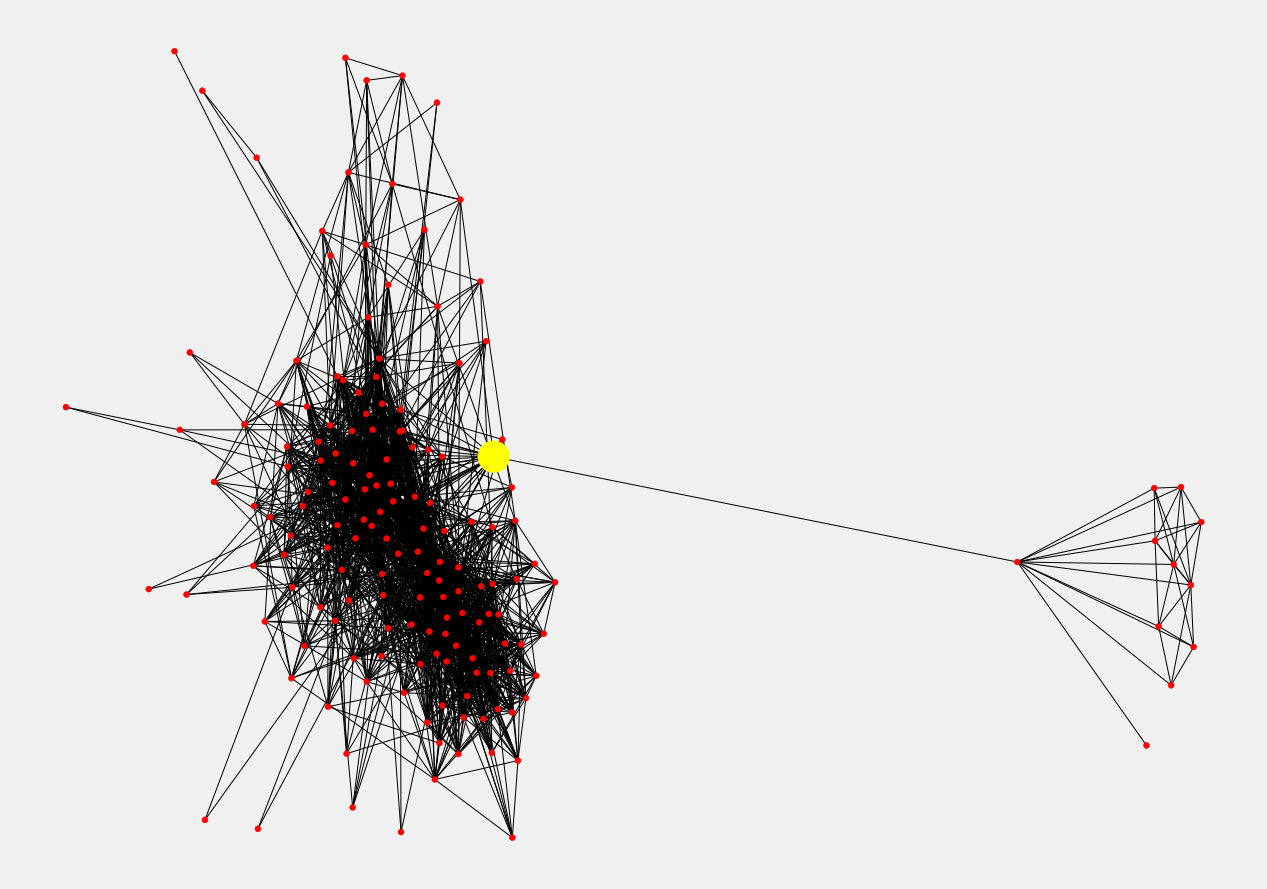

In [72]:
# Visualising the most influential users painting them in yellow :

node_color = ['yellow' if v == 3438 else 'red' for v in subgraph_3438]

node_size = [1000 if v == 3438 else 35 for v in subgraph_3438] 

plt.style.use('fivethirtyeight') 

plt.rcParams['figure.figsize'] = (20, 15)

plt.axis('off')

nx.draw_networkx(subgraph_3438, pos, with_labels = False, node_color=node_color,node_size=node_size )

plt.show()

### Graph Algorithms: Centrality Measures

There are many metrics of centrality that we can use as functionality for our machine learning models. We’ll talk about two of them:

**Centrality measures:** Betweenness centrality quanties how many times a particular node comes in the shortest chosen path between two other nodes.
* Centrality between the two: It is not only the users who have the most friends that are important, the users who connect one geography to another are also important because it allows users to see content from various geographies. The centrality of the in-between quantifies the number of times a particular node arrives in the shortest path chosen between two other nodes.

**Degree Centrality**: It is simply the number of connections for a node.

The centrality measures can be used as a feature in machine learning models:

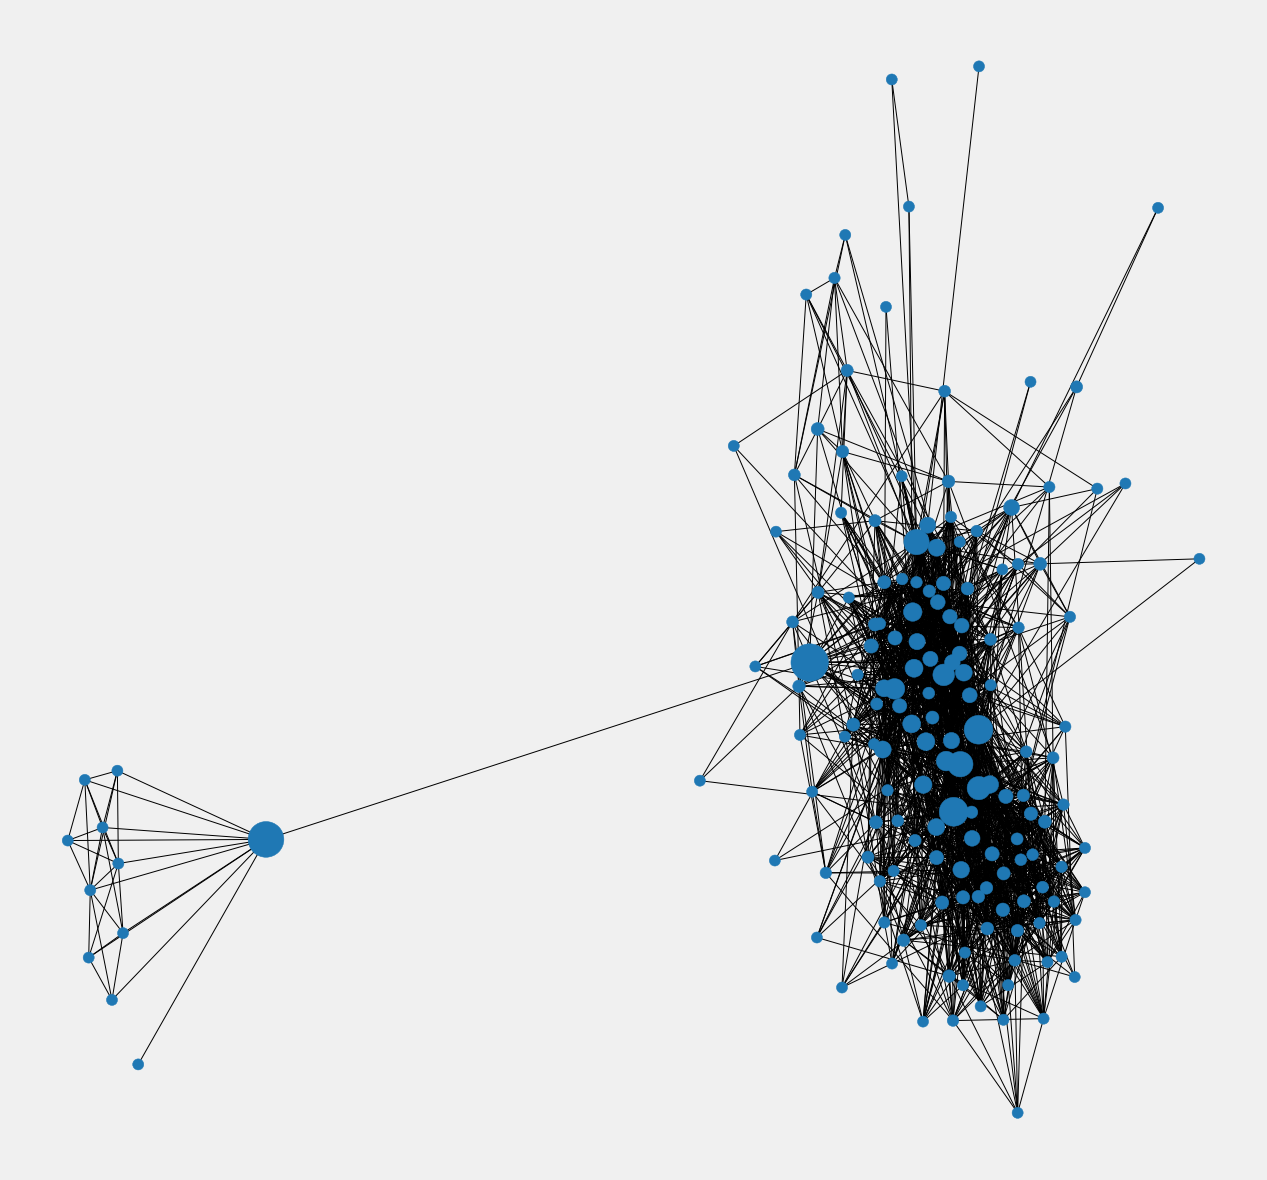

In [73]:
# Here is the code for finding the Betweenness centrality for the subgraph.

pos = nx.spring_layout(subgraph_3438) 
betweennessCentrality = nx.betweenness_centrality(subgraph_3438,normalized=True, endpoints=True)
node_size = [v * 10000 for v in betweennessCentrality.values()] 
plt.figure(figsize=(20,20))
nx.draw_networkx(subgraph_3438, pos=pos, with_labels=False, node_size=node_size )
plt.axis('off')
plt.show()

We can see the nodes sized based on their centrality values between the two here. They can be considered as information brokers. Breaking one of the nodes with high centrality between the two will split the graph into several parts.